#NOTES
Every electrode is:
['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 'FC2', 'F4', 'F8', 'Fp2', 'HighBitFlex', 'SaturationFlag', 'RawCq', 'Battery', 'BatteryPercent', 'MarkerHardware', 'CQ.Cz', 'CQ.Fz', 'CQ.Fp1', 'CQ.F7', 'CQ.F3', 'CQ.FC1', 'CQ.C3', 'CQ.FC5', 'CQ.FT9', 'CQ.T7', 'CQ.CP5', 'CQ.CP1', 'CQ.P3', 'CQ.P7', 'CQ.PO9', 'CQ.O1', 'CQ.Pz', 'CQ.Oz', 'CQ.O2', 'CQ.PO10', 'CQ.P8', 'CQ.P4', 'CQ.CP2', 'CQ.CP6', 'CQ.T8', 'CQ.FT10', 'CQ.FC6', 'CQ.C4', 'CQ.FC2', 'CQ.F4', 'CQ.F8', 'CQ.Fp2', 'CQ.Overall', 'EQ.SampleRateQua', 'EQ.OVERALL', 'EQ.Cz', 'EQ.Fz', 'EQ.Fp1', 'EQ.F7', 'EQ.F3', 'EQ.FC1', 'EQ.C3', 'EQ.FC5', 'EQ.FT9', 'EQ.T7', 'EQ.CP5', 'EQ.CP1', 'EQ.P3', 'EQ.P7', 'EQ.PO9', 'EQ.O1', 'EQ.Pz', 'EQ.Oz', 'EQ.O2', 'EQ.PO10', 'EQ.P8', 'EQ.P4', 'EQ.CP2', 'EQ.CP6', 'EQ.T8', 'EQ.FT10', 'EQ.FC6', 'EQ.C4', 'EQ.FC2', 'EQ.F4', 'EQ.F8', 'EQ.Fp2', 'MOT.TimestampS', 'MOT.TimestampMs', 'MOT.OrTimestampS', 'MOT.OrTimestampM', 'MOT.CounterMems', 'MOT.Interpolated', 'MOT.Q0', 'MOT.Q1', 'MOT.Q2', 'MOT.Q3', 'MOT.AccX', 'MOT.AccY', 'MOT.AccZ', 'MOT.MagX', 'MOT.MagY', 'MOT.MagZ']


In [2]:
import mne
from mne.preprocessing import ICA  # Import it explicitly to minimize required code and refer to it more easily

plot = False

## Definitions:

# Define eeg channels for when we need to pass them explicitly as arguments
eeg_channels = ['Cz', 'Fz', 'Fp1', 'F7', 'F3', 'FC1', 'C3', 'FC5', 'FT9', 'T7', 'CP5', 'CP1', 'P3', 'P7', 
                'PO9', 'O1', 'Pz', 'Oz', 'O2', 'PO10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'FT10', 'FC6', 'C4', 
                'FC2', 'F4', 'F8', 'Fp2']

eog_channels=['Fp1', 'Fp2']


### Syntax: mne.io.read_raw_edf(r'file', eog=[list of eog channels], preload=True, speed things up, infer_types=True, discover channel types) 
#raw = mne.io.read_raw_edf(r'EDF+\103918\103918.edf', eog=['Fp1', 'Fp2'], preload=True, infer_types=True) ##NOTE: YOU MUST watch the capitalization!
raw = mne.io.read_raw_edf(
    r'EDF+\254362\254362.edf',
    #eog=['Fp1', 'Fp2'], # Define eog channels!  I suggest trying making a copy of these as eog1 and eog2 ##NOTE: YOU MUST watch the capitalization!
    misc=None, # List of channel names to be considered as miscellaneous (MISC) channels.
    stim_channel=None,  # Set to None if you don't have a stim channel
    exclude=['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'HighBitFlex', 
             'SaturationFlag', 'RawCq', 'Battery', 'BatteryPercent', 'MarkerHardware', 'CQ.Cz', 'CQ.Fz', 'CQ.Fp1', 
             'CQ.F7', 'CQ.F3', 'CQ.FC1', 'CQ.C3', 'CQ.FC5', 'CQ.FT9', 'CQ.T7', 'CQ.CP5', 'CQ.CP1', 'CQ.P3', 'CQ.P7', 
             'CQ.PO9', 'CQ.O1', 'CQ.Pz', 'CQ.Oz', 'CQ.O2', 'CQ.PO10', 'CQ.P8', 'CQ.P4', 'CQ.CP2', 'CQ.CP6', 'CQ.T8', 
             'CQ.FT10', 'CQ.FC6', 'CQ.C4', 'CQ.FC2', 'CQ.F4', 'CQ.F8', 'CQ.Fp2', 'CQ.Overall', 'EQ.SampleRateQua', 
             'EQ.OVERALL', 'EQ.Cz', 'EQ.Fz', 'EQ.Fp1', 'EQ.F7', 'EQ.F3', 'EQ.FC1', 'EQ.C3', 'EQ.FC5', 'EQ.FT9', 
             'EQ.T7', 'EQ.CP5', 'EQ.CP1', 'EQ.P3', 'EQ.P7', 'EQ.PO9', 'EQ.O1', 'EQ.Pz', 'EQ.Oz', 'EQ.O2', 'EQ.PO10', 
             'EQ.P8', 'EQ.P4', 'EQ.CP2', 'EQ.CP6', 'EQ.T8', 'EQ.FT10', 'EQ.FC6', 'EQ.C4', 'EQ.FC2', 'EQ.F4', 'EQ.F8', 
             'EQ.Fp2', 'MOT.TimestampS', 'MOT.TimestampMs', 'MOT.OrTimestampS', 'MOT.OrTimestampM', 'MOT.CounterMems', 
             'MOT.Interpolated', 'MOT.Q0', 'MOT.Q1', 'MOT.Q2', 'MOT.Q3', 'MOT.AccX', 'MOT.AccY', 'MOT.AccZ', 
             'MOT.MagX', 'MOT.MagY', 'MOT.MagZ'],  # Exclude channels you don't want
    preload=True,  # Preload data into memory to speed things up
    infer_types=True,  # Infer channel types from names
    verbose=False  # Set verbosity / output messages
    )

montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')
raw.pick('eeg') # Pick only eeg related data!  However, we still have more data then we need!  We'll plot only the channels we want
# raw.plot(picks=eeg_channels, block=True) #Block must be True if working interactively with a .py file.  Also, we are picking only eeg channels
#Filtering options
filtered = raw.copy().filter(
            l_freq=1, #NOTE: This is a key value to experiment with!
            h_freq=40, #The high frequency cut off
            picks=eeg_channels, #Explicitly pass the channels so it doesn't try and filter contact quality, for example
            n_jobs = 4, #The more, the faster the processing            
            ) # Apply bandpass filter
ica = ICA(n_components=32, random_state=97, max_iter="auto")
ica.fit(filtered)


# Find EOG and muscle artifacts
eog_indices, eog_scores = ica.find_bads_eog(filtered, ch_name=['Fp1','Fp2'])
muscle_noise_indices, muscle_noise_scores = ica.find_bads_muscle(filtered)

# Exclude the identified artifact components
ica.exclude = list(set(eog_indices + muscle_noise_indices))

# Apply ICA to the raw data
filtered_clean = ica.apply(filtered.copy())
# raw #Block must be True if working interactively with a .py file.  Also, we are picking only eeg channels
if plot:
    filtered_clean.pick('eeg').plot(picks=eeg_channels, title = 'Filtered Data',block=True)

brain_waves = {
    'Delta': (0.1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta Low': (13, 20),
    'Beta High': (20, 30),
    'Gamma': (30, 40)
}

# Define the electrode locations by brain lobes
brain_lobes = {
    'Frontal': ['Fz', 'Fp1', 'F7', 'F3', 'FC1', 'Fp2', 'FC2', 'F4', 'F8'],
    'Temporal': ['FT9', 'T7', 'FT10', 'T8'],
    'Parietal': ['Cz', 'C3', 'CP5', 'CP1', 'P3', 'P7', 'Pz', 'P4', 'CP2', 'CP6'],
    'Occipital': ['PO9', 'O1', 'Oz', 'O2', 'PO10']
}

# Initialize brain_wave_rows for brain lobes
brain_wave_lobes = {lobe: {wave: None for wave in brain_waves} for lobe in brain_lobes}

# Initialize a dictionary to hold the average statistics
brain_wave_lobes_avg = {lobe: {wave: None for wave in brain_waves} for lobe in brain_lobes}

# Initialize a dictionary to hold the statistics
brain_wave_statistics = {wave: {} for wave in brain_waves}

# Initialize brain_wave_rows to get them from DF later
brain_wave_rows = {wave: None for wave in brain_waves}

# Initialize a dictionary to hold the statistics
brain_wave_lobes_statistics = {lobe: {wave: {} for wave in brain_waves} for lobe in brain_lobes}

pdf_value = filtered_clean.compute_psd(
    method = 'welch', # 'multitaper' OR 'welch' OPTION: welch
    fmin = 1,
    fmax = 40,
    tmin = None, #0,
    tmax = None, #60,
    picks = 'eeg',
    proj = False
)

df = pdf_value.to_data_frame(picks = eeg_channels)

print(df)
# Populate brain_wave_lobes with filtered DataFrame rows for each lobe and wave
for lobe, electrodes in brain_lobes.items():
    for wave, (min_freq, max_freq) in brain_waves.items():
        filtered_rows = df[(df['freq'] >= min_freq) & (df['freq'] <= max_freq)][electrodes]
        brain_wave_lobes[lobe][wave] = filtered_rows

# Calculate statistics for each brain wave per electrode location within each lobe
for lobe, waves in brain_wave_lobes.items():
    for wave, rows in waves.items():
        for col in rows.columns:
            desc = rows[col].describe(percentiles=[.25, .5, .75])
            median = rows[col].median()
            brain_wave_lobes_statistics[lobe][wave][col] = {
                'count': desc['count'],
                'mean': desc['mean'],
                'std': desc['std'],
                'min': desc['min'],
                '25%': desc['25%'],
                '50%': median,  # Using median for 50%
                '75%': desc['75%'],
                'max': desc['max'],
            }

# Print the statistics for each lobe and wave to verify
for lobe, waves in brain_wave_lobes_statistics.items():
    print(f'{lobe} statistics:')
    for wave, stats in waves.items():
        print(f'  {wave}:')
        for electrode, stat in stats.items():
            print(f'    {electrode}:')
            for key, value in stat.items():
                print(f'      {key}: {value}')

# Calculate average across all electrodes within each brain lobe for each brain wave
for lobe, electrodes in brain_lobes.items():
    for wave, (min_freq, max_freq) in brain_waves.items():
        filtered_rows = df[(df['freq'] >= min_freq) & (df['freq'] <= max_freq)][electrodes]
        avg_across_electrodes = filtered_rows.mean(axis=1)  # Calculate mean across electrodes
        brain_wave_lobes_avg[lobe][wave] = avg_across_electrodes.mean()  # Mean of means across frequencies

# Print the averages for each lobe and wave to verify
for lobe, waves in brain_wave_lobes_avg.items():
    print(f'{lobe} average statistics:')
    for wave, value in waves.items():
        print(f'  {wave}: {value}')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    1.7s finished


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 32 components
Fitting ICA took 10.1s.
Using EOG channels: Fp1, Fp2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Effective window size : 16.000 (s)
Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 19 ICA components
    Projecting back using 32 PCA components
Effective window size : 16.000 (s)
        freq            Cz            Fz           Fp1            F7  \
0     1.0000  1.361206e-10  1.650613e-10  9.970439e-11  9.429015e-11   
1     1.0625  7.465364e-11  9.746636e-11  5.538178e-11  5.511506e-11   
2     1.1250  5.591167e-11  8.815989e-11  4.622637e-11  4.519126e-11   
3     1.1875  6.114345e-11  7.866973e-11  5.009913e-11  5.016423e-11   
4     1.2500  6.272510e-11  6.617430e-11  5.277079e-11  5.346382e-11   
..       ...           ...           ...           ...           ...   
620  39.7500  4.296620e-13  5.043027e-13  3.596986e-13  3.306069e-13   
621  39.8125  3.167286e-13  4.268161e-13  2.739923e-13  2.609616e-13   
622  39.8750  4.088544e-13  4.302215e-13  2.693648e-13  2.449910e-13   
623  39.9375  3.552827e-13  3.104861e-13  2.613170e-13  2

In [11]:
print(df)

            freq            Cz            Fz           Fp1            F7  \
0       1.000000  1.690448e-08  1.485094e-08  1.234855e-08  1.093570e-08   
1       1.000889  1.930969e-08  1.743044e-08  1.419249e-08  1.190477e-08   
2       1.001778  2.051664e-08  2.195553e-08  1.412108e-08  1.184045e-08   
3       1.002667  2.232988e-08  2.140974e-08  1.426664e-08  1.222912e-08   
4       1.003556  2.450858e-08  2.009787e-08  1.212055e-08  1.090187e-08   
...          ...           ...           ...           ...           ...   
43871  39.996444  6.827253e-11  4.227949e-11  3.721435e-11  2.895640e-11   
43872  39.997333  6.255727e-11  4.153910e-11  3.728497e-11  2.905663e-11   
43873  39.998222  6.467973e-11  4.392037e-11  4.390923e-11  3.739488e-11   
43874  39.999111  5.996386e-11  4.878491e-11  4.301324e-11  3.851797e-11   
43875  40.000000  6.512277e-11  4.235196e-11  4.019674e-11  3.650850e-11   

                 F3           FC1            C3           FC5           FT9  \
0      1

In [21]:
# print(pdf_value[:])
for line in pdf_value:
    for col in line:
        print(col, end = ', this is a column')
    print(' THIS IS A LINE')

[1.69044768e-08 1.93096918e-08 2.05166353e-08 ... 6.46797292e-11
 5.99638648e-11 6.51227671e-11], this is a column THIS IS A LINE
[1.48509376e-08 1.74304378e-08 2.19555300e-08 ... 4.39203683e-11
 4.87849116e-11 4.23519644e-11], this is a column THIS IS A LINE
[1.23485457e-08 1.41924931e-08 1.41210752e-08 ... 4.39092346e-11
 4.30132399e-11 4.01967384e-11], this is a column THIS IS A LINE
[1.09356968e-08 1.19047658e-08 1.18404512e-08 ... 3.73948785e-11
 3.85179728e-11 3.65084959e-11], this is a column THIS IS A LINE
[1.04390496e-08 1.23739563e-08 1.01163214e-08 ... 2.95532868e-11
 2.77750552e-11 2.52131393e-11], this is a column THIS IS A LINE
[3.18348354e-08 3.35115601e-08 3.44521046e-08 ... 6.74843074e-11
 5.84260128e-11 5.33313683e-11], this is a column THIS IS A LINE
[1.31111498e-08 1.56454663e-08 1.65182154e-08 ... 6.24907425e-11
 7.08514563e-11 7.97747438e-11], this is a column THIS IS A LINE
[1.02464871e-08 1.09973016e-08 1.11392388e-08 ... 5.87531009e-11
 6.05951399e-11 5.8237925

In [53]:
## MUST import inspect to discover what arguments the functions take
import inspect


In [54]:
signature = inspect.signature(pdf_value.plot_topo)
print(signature)


(*, dB=True, layout=None, color='w', fig_facecolor='k', axis_facecolor='k', axes=None, block=False, show=True)


In [52]:
## Dir is a disappointment here!
dir(pdf_value.plot_topo)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [ ]:
pdf_value.plot_topo(layout=None, 
                    # layout_scale=0.945, 
                    color='black', 
                    fig_facecolor='white', 
                    axis_facecolor='white', 
                    show=True
                    )

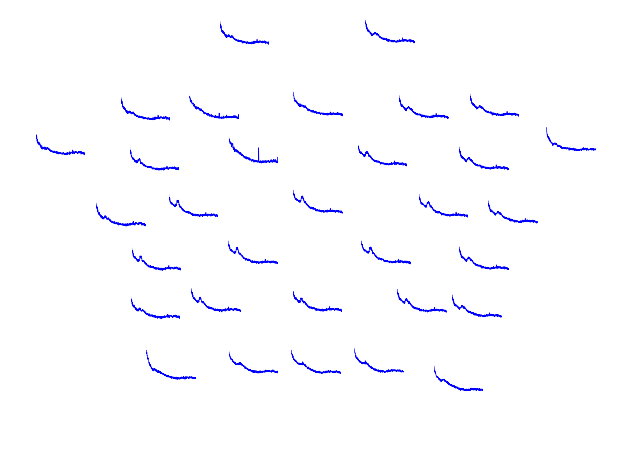

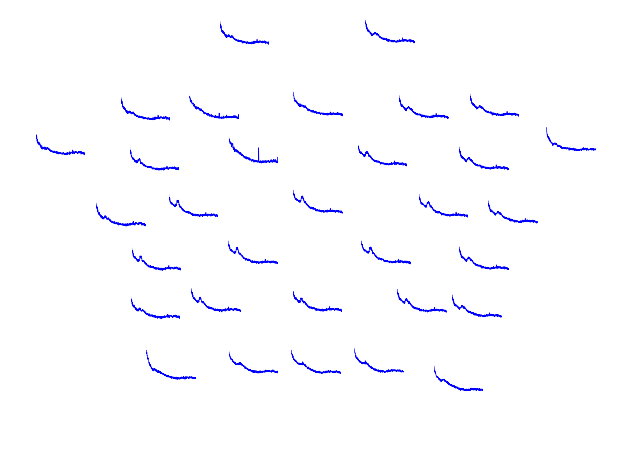

In [62]:
pdf_value.plot_topo(layout=None, 
                    # layout_scale=0.945, 
                    dB=True, 
                    # layout=None, 
                    # color='w', fig_facecolor='k', 
                    # axis_facecolor='k', 
                    # axes=None, 
                    # block=False, 
                    # show=True)
                    color='black', 
                    fig_facecolor='white', 
                    axis_facecolor='white', 
                    show=True
                    )

Using matplotlib as 2D backend.


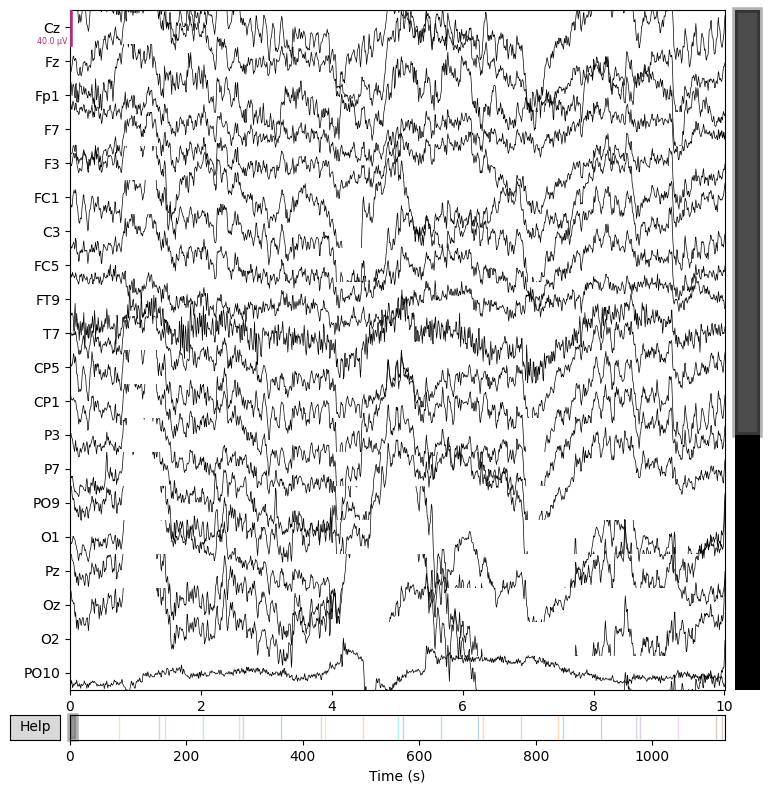

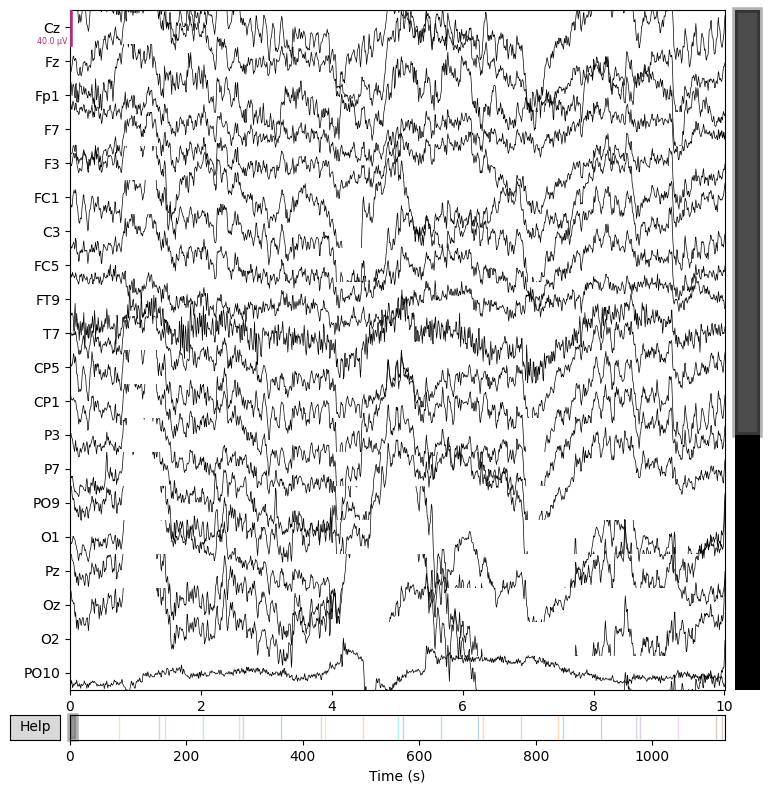

In [22]:
raw.plot()

Plotting power spectral density (dB=True).


C:\Users\Admin\AppData\Local\Temp\ipykernel_8172\3148186.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  pdf_value.plot()
r:\FINAL_EDF_REPO\EDF_analysis\.venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


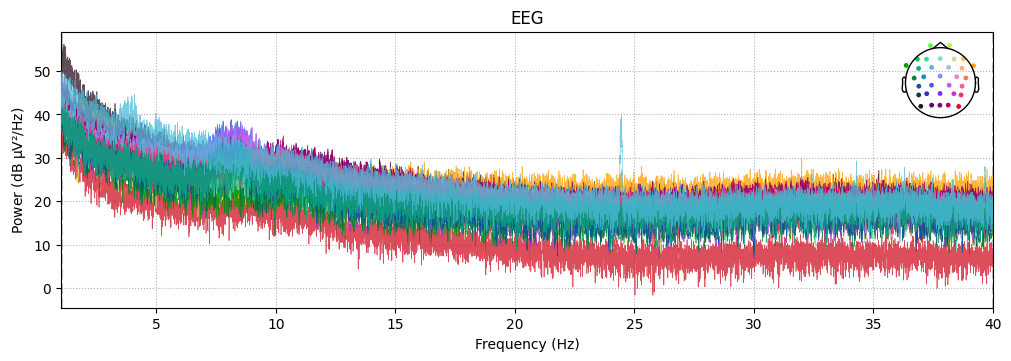

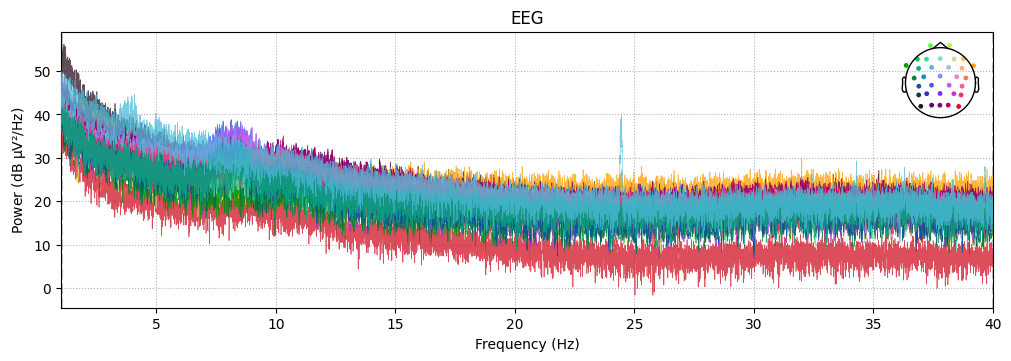

In [23]:
pdf_value.plot()